<a href="https://colab.research.google.com/github/Manju-5/Assignment/blob/main/Assignment_on_classification_by_Manju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing essential libraries
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('iris.xls')  # 1. Reading the dataset to python environment
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**2. Preprocessing**

In [3]:
data.info() # checking details of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Filling missing values**

In [5]:
from sklearn.impute import SimpleImputer   
imputer=SimpleImputer(missing_values=np.nan)

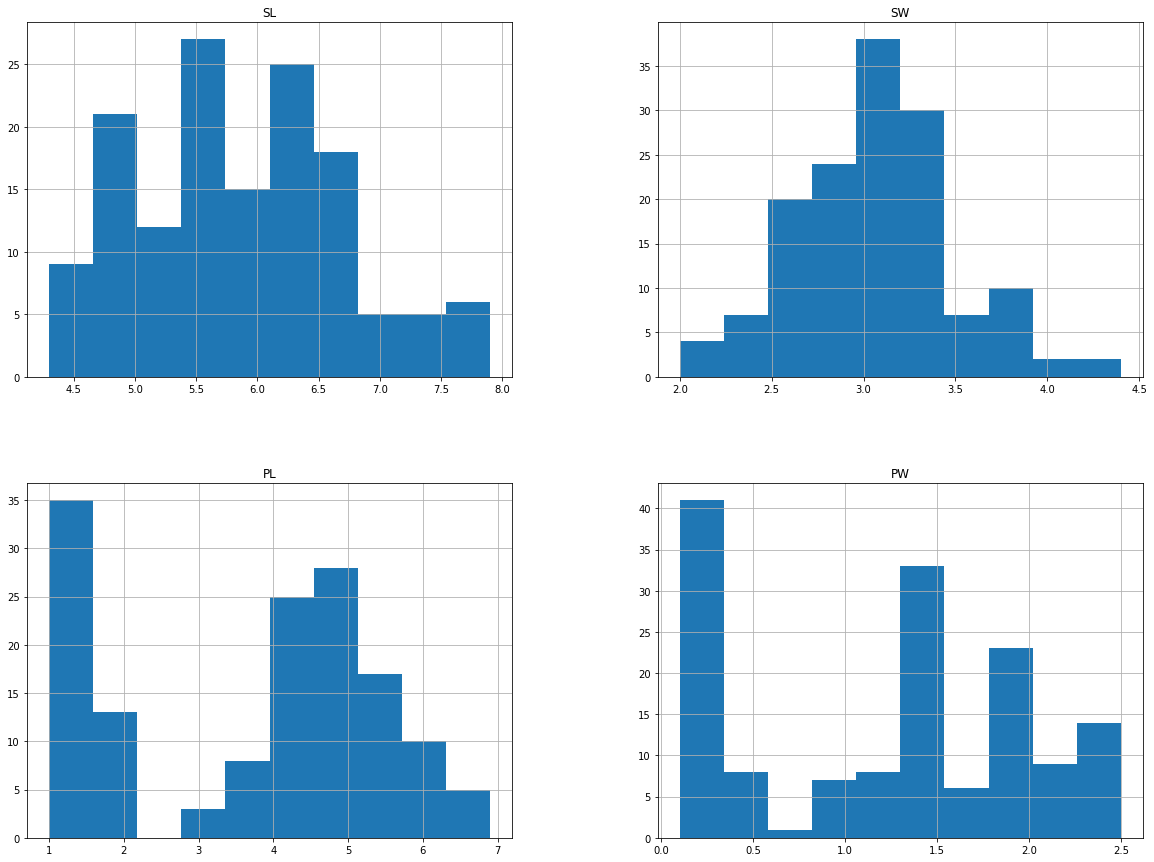

In [6]:
freqgraph=data.select_dtypes(include=['float'])  # gives detail about the skewness and distribution of data
freqgraph.hist(figsize=(20,15))
plt.show() 

In [7]:
data.isna().sum() # checking for presence of null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
for col in ['SL', 'SW', 'PL']:
  data [col]=data[col].fillna(data[col].median())  # median can be used to fill null values

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling Outliers

Text(0.5, 1.0, 'Sepal Length')

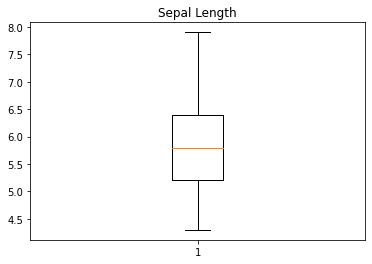

In [11]:
plt.boxplot(data['SL'])
plt.title('Sepal Length')

No outlies in sepal length column

Text(0.5, 1.0, 'Sepal Width')

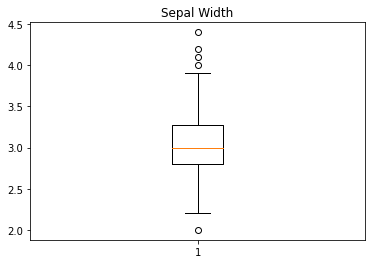

In [12]:
plt.boxplot(data['SW'])
plt.title('Sepal Width')

In [13]:
Q1=np.percentile(data['SW'],25, interpolation='midpoint')
Q2=np.percentile(data['SW'],50, interpolation='midpoint')
Q3=np.percentile(data['SW'],75, interpolation='midpoint')
print (Q1)
print (Q2)
print (Q3)

2.8
3.0
3.25


In [14]:
IQR= Q3-Q1
IQR

0.4500000000000002

In [15]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print (low_lim)
print (up_lim)

2.1249999999999996
3.9250000000000003


In [16]:
# finding outliers values
outliers=[]
for i in data ['SW']:
  if (i> up_lim) or (i< low_lim):
    outliers.append(i)
outliers  

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
# finding index of outliers
ind=data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [18]:
ind=data['SW']<low_lim
data.loc[ind].index

Int64Index([60], dtype='int64')

In [19]:
# removing outlies
data1=data.drop([14, 15, 32, 33,60])
data1.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Petal Length')

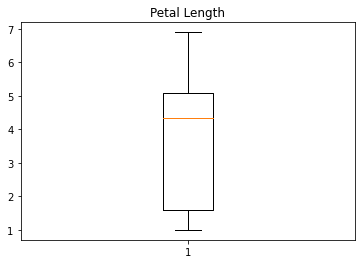

In [20]:
plt.boxplot(data['PL'])
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Width')

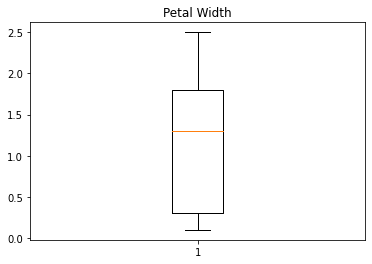

In [21]:
plt.boxplot(data['PW'])
plt.title('Petal Width')

No outlier for petal length and petal width columns.

In [22]:
corrmatrix=data1.corr() # visualising correlation matrix

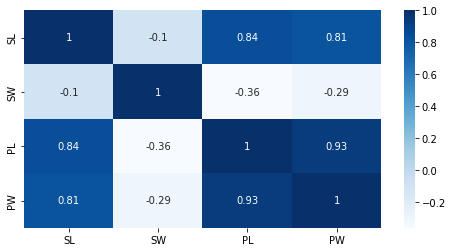

In [23]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix, annot=True, cmap='Blues')

In [24]:
data1['Classification'].nunique() # Number of classes is implied by the unique values of classification field

3

In [25]:
data1['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [26]:
data1['Classification'].value_counts(normalize=True) # normalised, percentage values

Iris-virginica     0.344828
Iris-versicolor    0.337931
Iris-setosa        0.317241
Name: Classification, dtype: float64

In [27]:
y=data1['Classification'] # 'Classification' as target
X=data1.drop('Classification', axis=1)  # features

**3 Classification Models**

Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**kNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier  # importing kNN classifier from neighbors class
metric_k=[] # creating an empty list
neighbors=range(3,18)

for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(X_train,y_train)
  y_pred_kNN=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [60]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207]

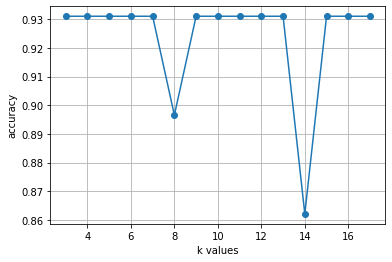

In [61]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [62]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred_kNN)

0.9310344827586207

In [65]:
# kNN model with scaling
metric_k1=[] # creating an empty list
neighbors1=range(3,18)


Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler  # min max scaling
min_max=MinMaxScaler(feature_range=(0,1))
X1=min_max.fit_transform(X)

In [31]:
type(X1)

numpy.ndarray

In [32]:
data1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [33]:
X1=pd.DataFrame(X1,columns=['SL', 'SW', 'PL', 'PW']) # regaining column titles
X1.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)  # splitting data as train and test

**SVM**

Model creation

In [38]:
from sklearn.svm import SVC  # importing SVC from svm class
clf_svm=SVC(kernel='linear')  # Using linear kernel svm : creating an instance
clf_svm=clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

Model evaluation

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix  # confusion matrix
confusion_matrix(y_test,y_pred_svm)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [40]:
accuracy_score(y_test,y_pred_svm) # accuracy

0.896551724137931

Model 2 of Support Vector Machine using rbf kernel

In [41]:
# model creation
clf_svm2=SVC(kernel='rbf')
clf_svm2=clf_svm2.fit(X_train,y_train)
y_pred_svm2=clf_svm2.predict(X_test)

In [42]:
# model evaluation
confusion_matrix(y_test,y_pred_svm2)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 3, 8]])

In [43]:
accuracy_score(y_test,y_pred_svm2)

0.8620689655172413

Thus svm model with linear kernel is better than that of rbf kernel in terms of accuracy.

Applying min-max scale

In [44]:
# model creation after min max scaling
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=.2,random_state=42)
clf_svm3=SVC(kernel='linear')
clf_svm3=clf_svm3.fit(X1_train,y_train)
y_pred_svm3=clf_svm3.predict(X1_test)

In [45]:
# model evaluation
confusion_matrix(y_test,y_pred_svm3)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 3, 8]])

In [46]:
accuracy_score(y_test,y_pred_svm3)

0.896551724137931

In [47]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=.2,random_state=42)
clf_svm4=SVC(kernel='rbf')
clf_svm4=clf_svm4.fit(X1_train,y_train)
y_pred_svm4=clf_svm4.predict(X1_test)

In [48]:
confusion_matrix(y_test,y_pred_svm4)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [49]:
accuracy_score(y_test,y_pred_svm4)

0.9310344827586207

Thus scaling improved model prediction.

**Decision Tree**

In [50]:
# model creation
from sklearn.tree import DecisionTreeClassifier # importing DTC from tree class
dt_clf=DecisionTreeClassifier()  # creating an instance
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [51]:
model evaluation
confusion_matrix(y_test,y_pred_dt)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [52]:
accuracy_score(y_test,y_pred_dt)

0.896551724137931

In [53]:
dt_clf2=DecisionTreeClassifier()         # Model creation with scaling
dt_clf2=dt_clf2.fit(X1_train,y_train)
y_pred_dt2=dt_clf2.predict(X1_test)

In [54]:
# model evaluation
confusion_matrix(y_test,y_pred_dt2)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

In [55]:
accuracy_score(y_test,y_pred_dt2)

0.896551724137931

Thus ccaling have no effect on decision tree model.

**Random Forest Algorithm**

In [56]:
# model creation
from sklearn.ensemble import RandomForestClassifier # importing RFC from ensemble class
rf_clf=RandomForestClassifier()  # creating an instance
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_clf=rf_clf.predict(X_test)

In [57]:
# model evaluation
confusion_matrix(y_test,y_pred_clf)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [58]:
accuracy_score(y_test,y_pred_clf)

0.9310344827586207

Accuracy improved in model with random Forest classifier.Random Forest Classifier provides the best model with comparatively less misclassifications.It is the effective machine learning algorithm for creating models based on idea of **bagging**.Here the **result of different multiple models(Decision tree) are combined to bring a better result**, hence gives the best result.Further **after scaling svm using rbf kernel** also provides better model.